In [1]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['AAPL', 'GOOG', 'BAC']

In [2]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np
import requests

DATA_TIMEZONE = pytz.timezone("EST")

def get_start_date(today):
    """
    Returns the date of 9 trading days ago
    """
    url = "https://query1.finance.yahoo.com/v7/finance/chart/X?period1={:.0f}&period2={:.0f}"\
          "&interval=1d&includeTimestamps=true".format((today - timedelta(days=20)).timestamp(), today.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']        

    result = chart['result'][0]
    return datetime.fromtimestamp(result['timestamp'][-9], tz=DATA_TIMEZONE)
            
get_start_date(datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0))

datetime.datetime(2017, 2, 15, 9, 30, tzinfo=<StaticTzInfo 'EST'>)

In [10]:
def get_data(symbol, start_date, end_date):
        
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1m&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start_date.timestamp(), end_date.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']
        
    if chart['error']:
        print(chart['error'])

    result = chart['result'][0]
    data = result['indicators']['quote'][0]
    data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
    df = pd.DataFrame(data)
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
dd = get_data("GOOG", get_start_date(today), today)
dd

,close,high,low,open,time,volume
0,820.025024,820.025024,819.989990,819.989990,2017-02-15 09:30:00-05:00,0.0
1,820.799988,820.799988,820.630005,820.630005,2017-02-15 09:31:00-05:00,4810.0
2,820.649963,820.649963,820.220032,820.220032,2017-02-15 09:32:00-05:00,4102.0
3,820.835022,821.119995,820.835022,820.880005,2017-02-15 09:33:00-05:00,7719.0
4,820.460022,820.489990,820.320007,820.489990,2017-02-15 09:34:00-05:00,7803.0
5,819.908508,819.908508,819.908508,819.908508,2017-02-15 09:35:00-05:00,5068.0
6,819.989990,819.989990,819.989990,819.989990,2017-02-15 09:36:00-05:00,2678.0
7,820.320007,820.960022,820.320007,820.960022,2017-02-15 09:37:00-05:00,6963.0
8,820.799988,820.799988,820.799988,820.799988,2017-02-15 09:38:00-05:00,2909.0
9,820.479980,821.000000,820.479980,821.000000,2017-02-15 09:39:00-05:00,4699.0


In [11]:
dd_len = len(dd)
dd['avg9days'] = dd.volume.rolling(window=dd_len, min_periods=1).mean()
dd['current_score'] = dd.volume / dd.avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

,close,high,low,open,time,volume,avg9days,current_score,rolling_score
0,820.025024,820.025024,819.989990,819.989990,2017-02-15 09:30:00-05:00,0.0,0.000000,NaN,NaN
1,820.799988,820.799988,820.630005,820.630005,2017-02-15 09:31:00-05:00,4810.0,2405.000000,2.000000,2.000000
2,820.649963,820.649963,820.220032,820.220032,2017-02-15 09:32:00-05:00,4102.0,2970.666667,1.380835,1.690417
3,820.835022,821.119995,820.835022,820.880005,2017-02-15 09:33:00-05:00,7719.0,4157.750000,1.856533,1.745789
4,820.460022,820.489990,820.320007,820.489990,2017-02-15 09:34:00-05:00,7803.0,4886.800000,1.596750,1.708530
5,819.908508,819.908508,819.908508,819.908508,2017-02-15 09:35:00-05:00,5068.0,4917.000000,1.030710,1.572966
6,819.989990,819.989990,819.989990,819.989990,2017-02-15 09:36:00-05:00,2678.0,4597.142857,0.582536,1.407894
7,820.320007,820.960022,820.320007,820.960022,2017-02-15 09:37:00-05:00,6963.0,4892.875000,1.423090,1.410065
8,820.799988,820.799988,820.799988,820.799988,2017-02-15 09:38:00-05:00,2909.0,4672.444444,0.622586,1.311630
9,820.479980,821.000000,820.479980,821.000000,2017-02-15 09:39:00-05:00,4699.0,4675.100000,1.005112,1.277572


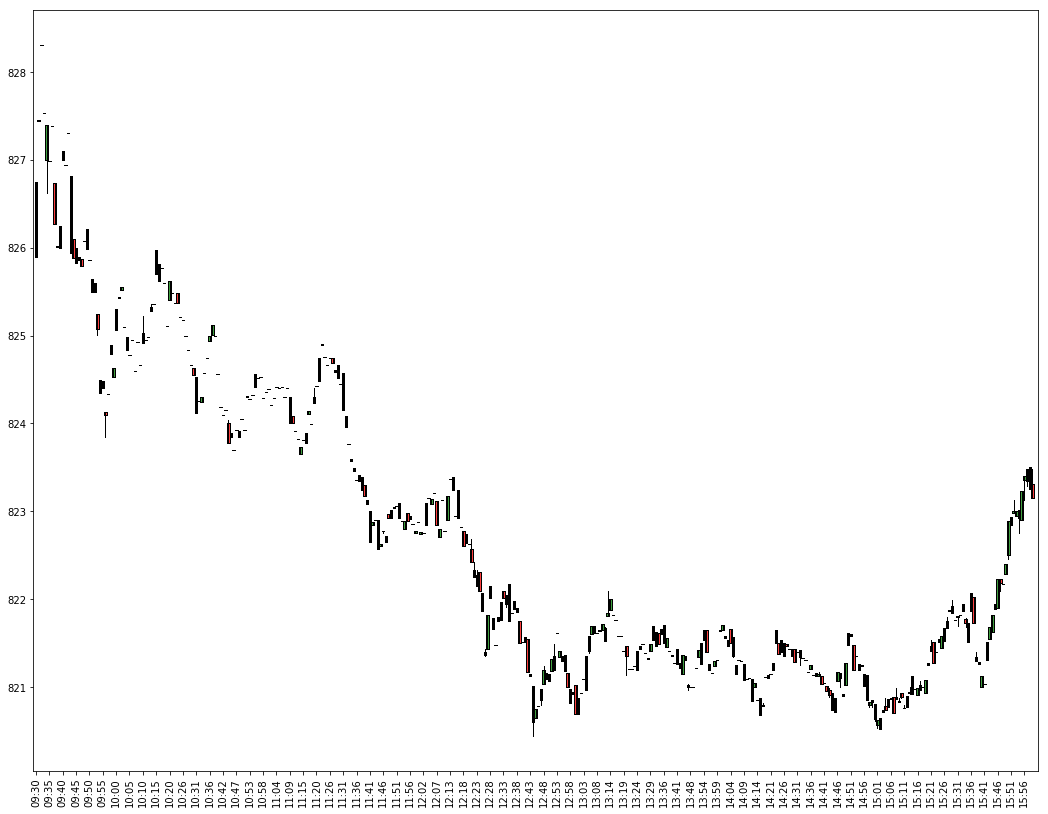

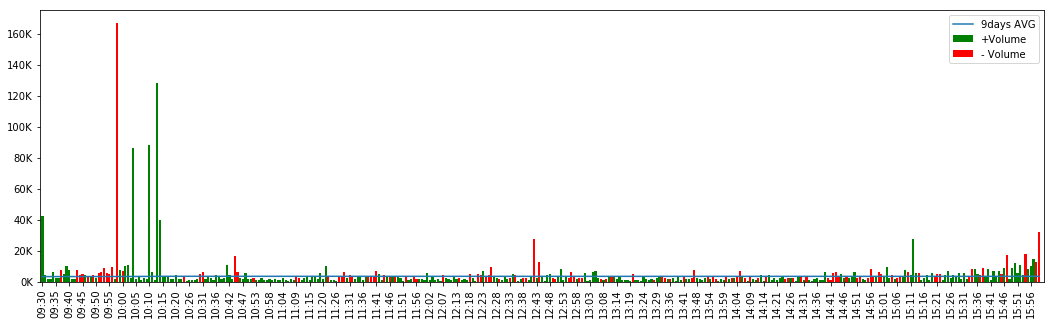

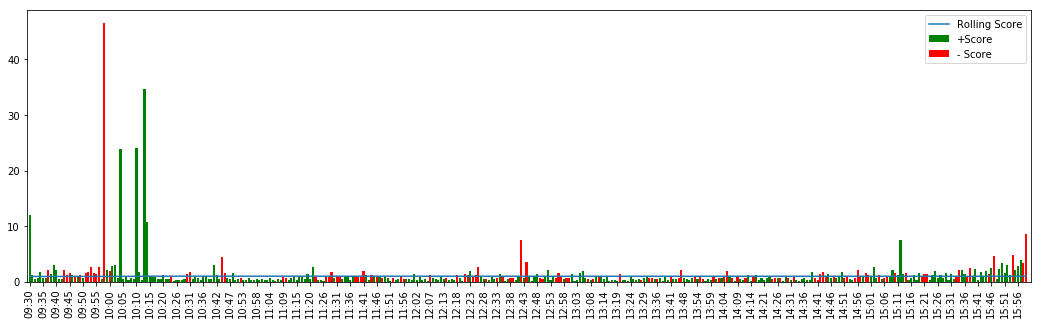

In [12]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker


def display_charts(df):
    df = df.reset_index()
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.loc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    plt.show()

last_date = dd.time.max()
last_day_data = dd[dd.time.dt.date == last_date.date()]
display_charts(last_day_data)

1. GOOG 12:59PM: Rolling Score 1.0522562895427596, Current Score 10.054927480857229


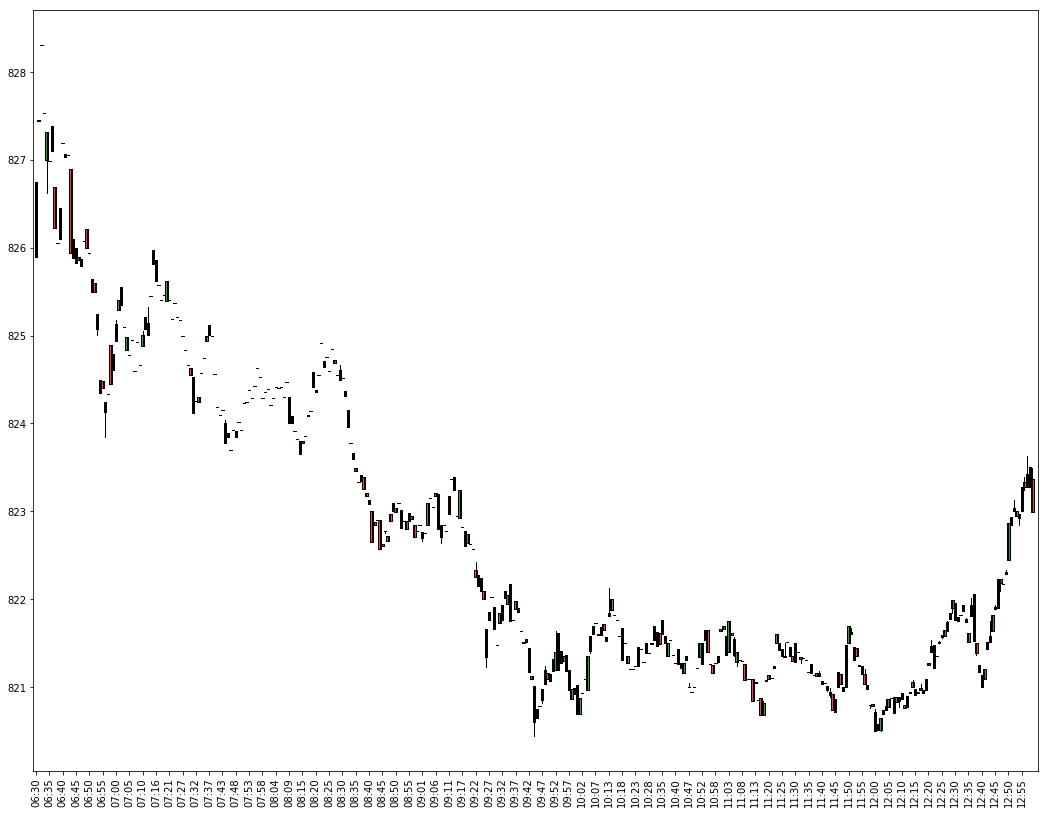

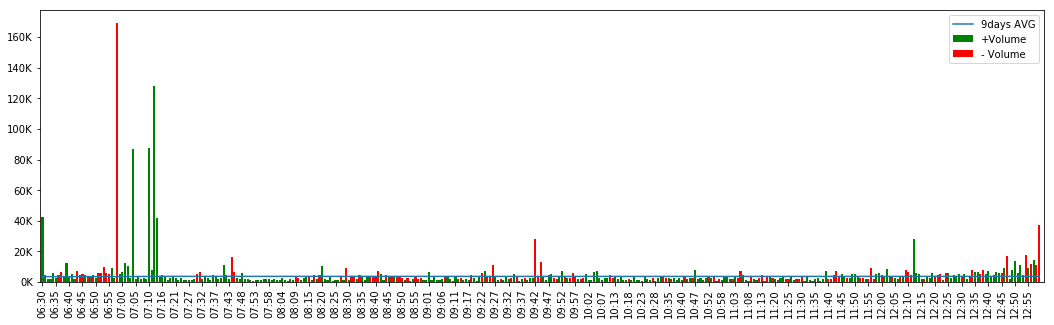

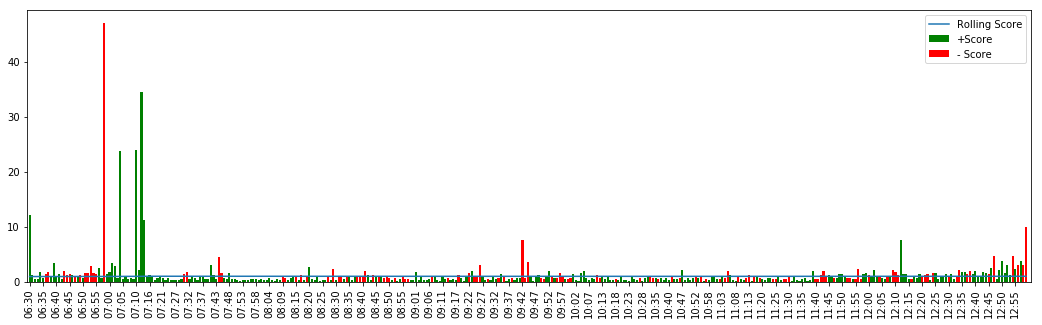

2. BAC 12:59PM: Rolling Score 0.7761281531946861, Current Score 7.297998483653746


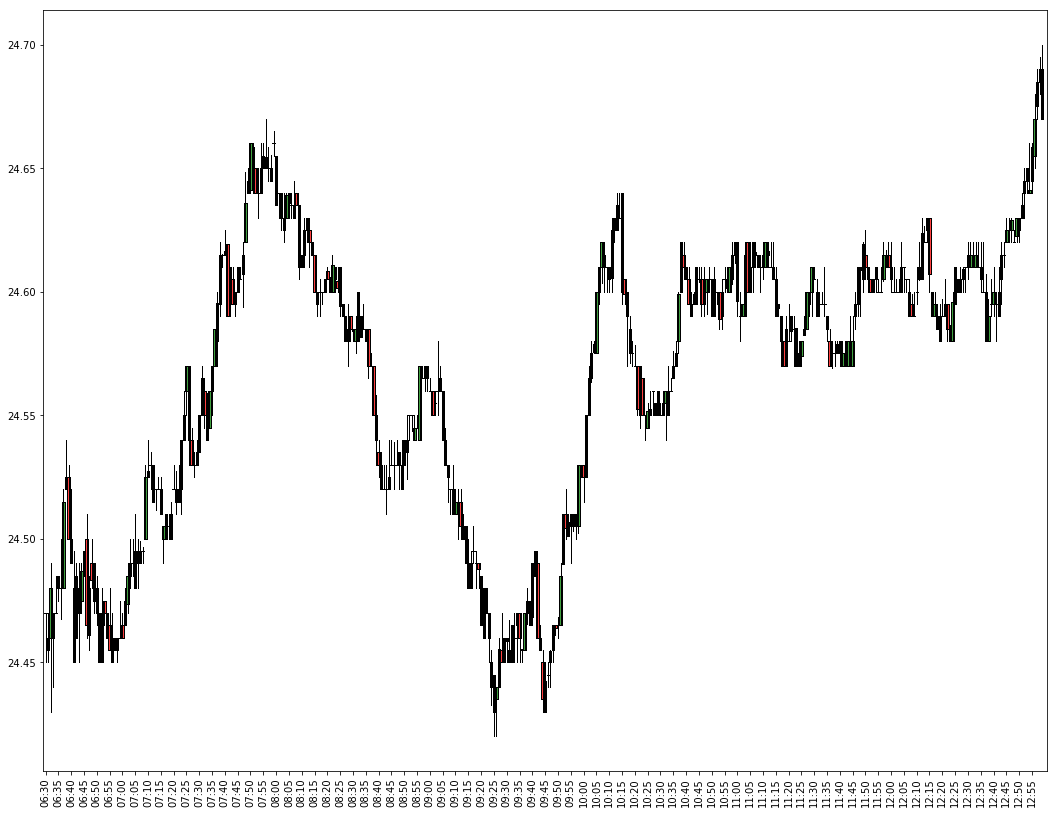

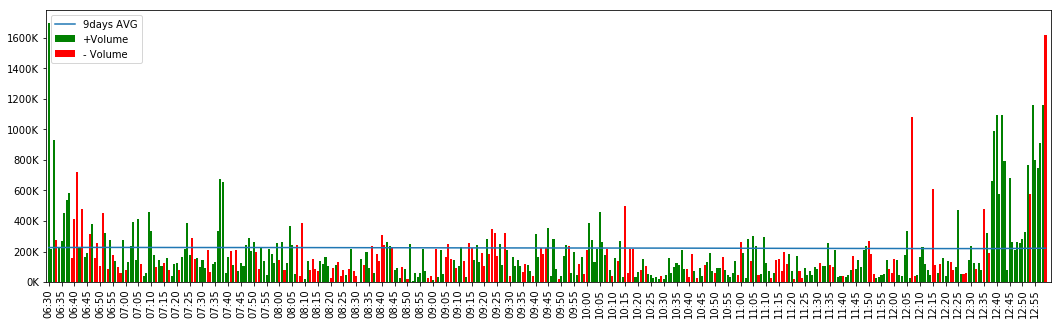

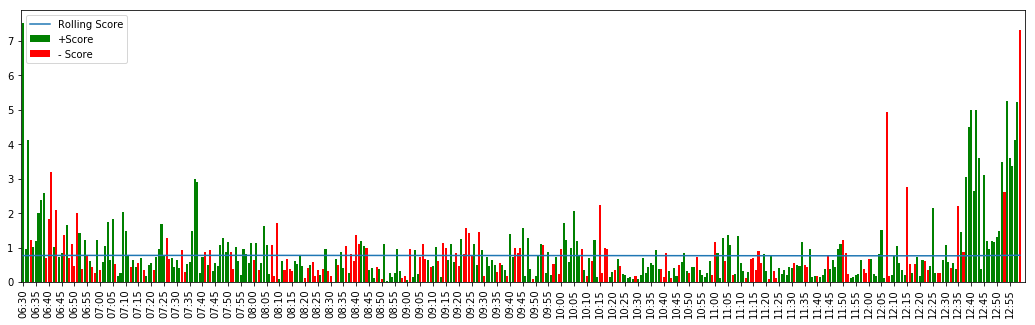

3. AAPL 12:59PM: Rolling Score 0.42627181686873294, Current Score 0.20920255428322587


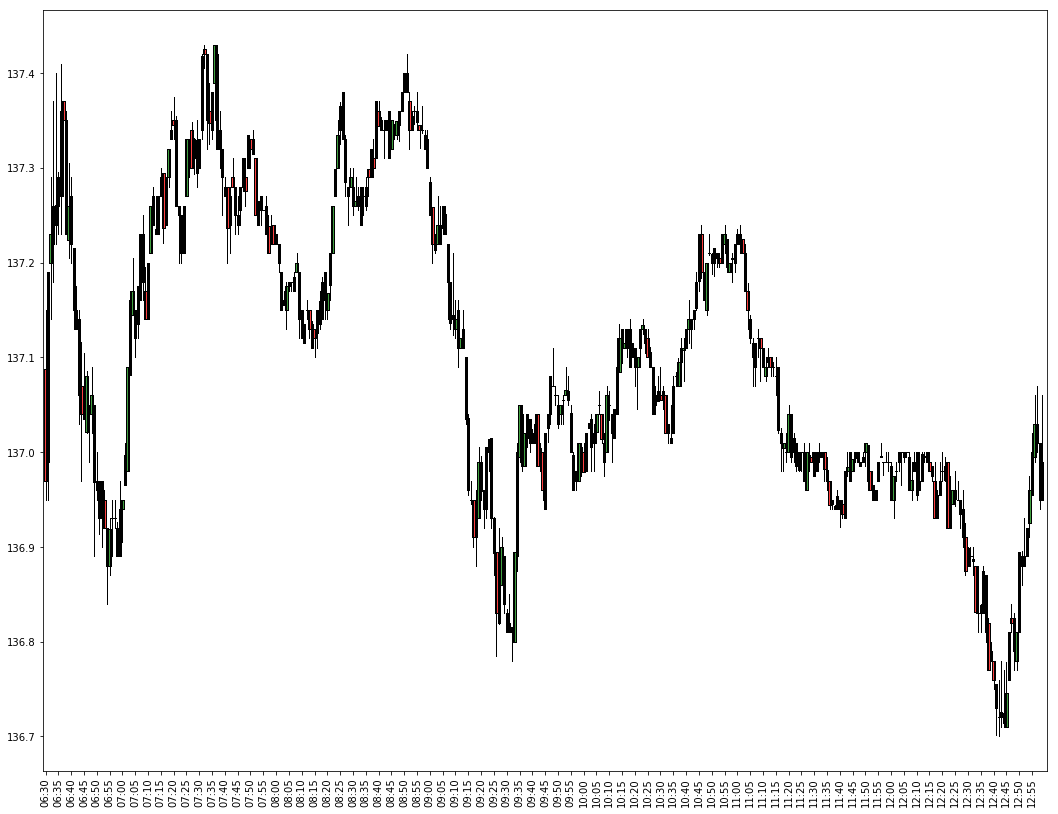

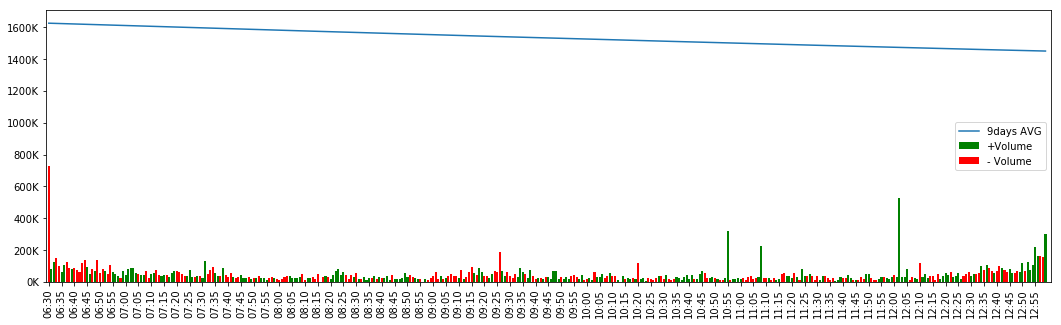

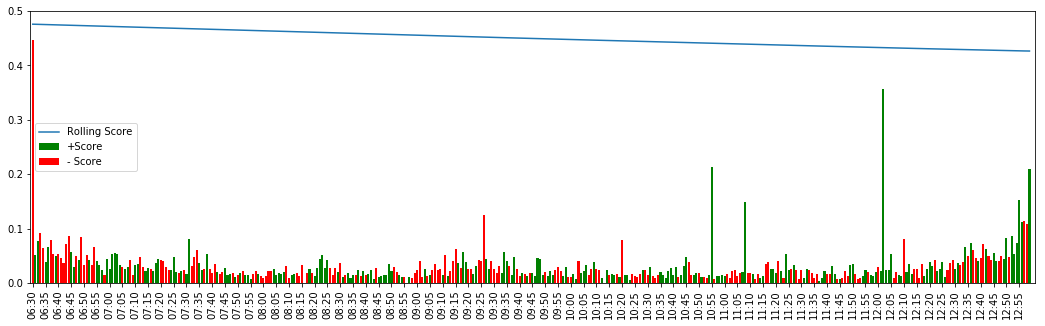

1. GOOG 12:59PM: Rolling Score 1.0522562895427596, Current Score 10.054927480857229


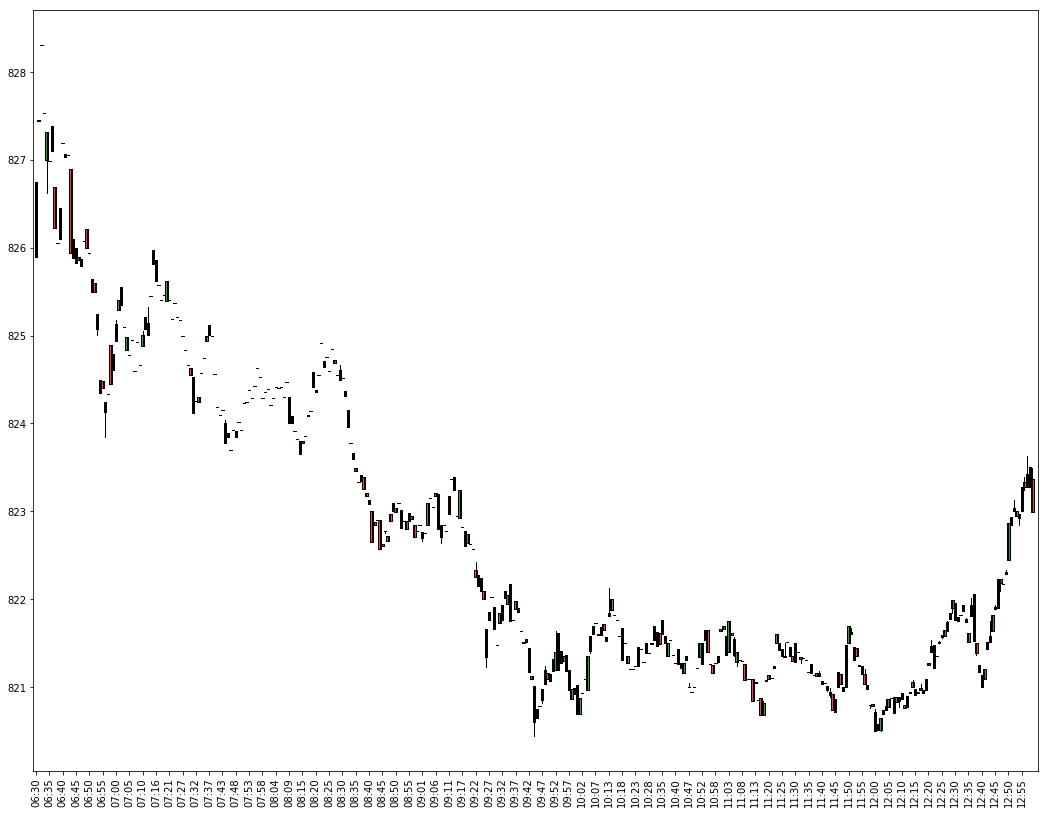

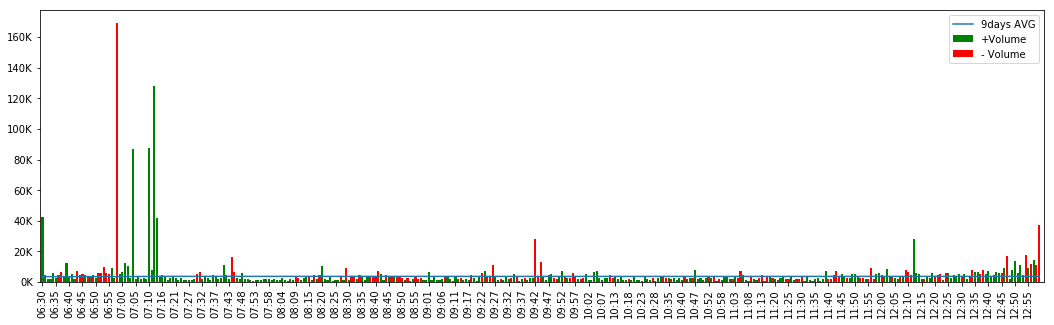

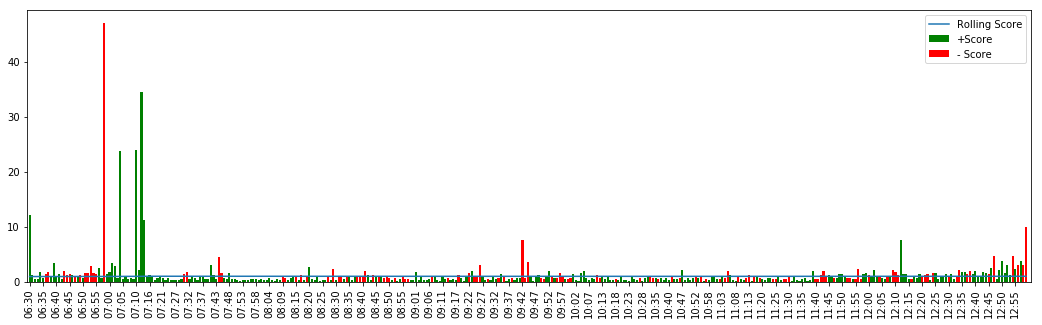

2. BAC 12:59PM: Rolling Score 0.7761281531946861, Current Score 7.297998483653746


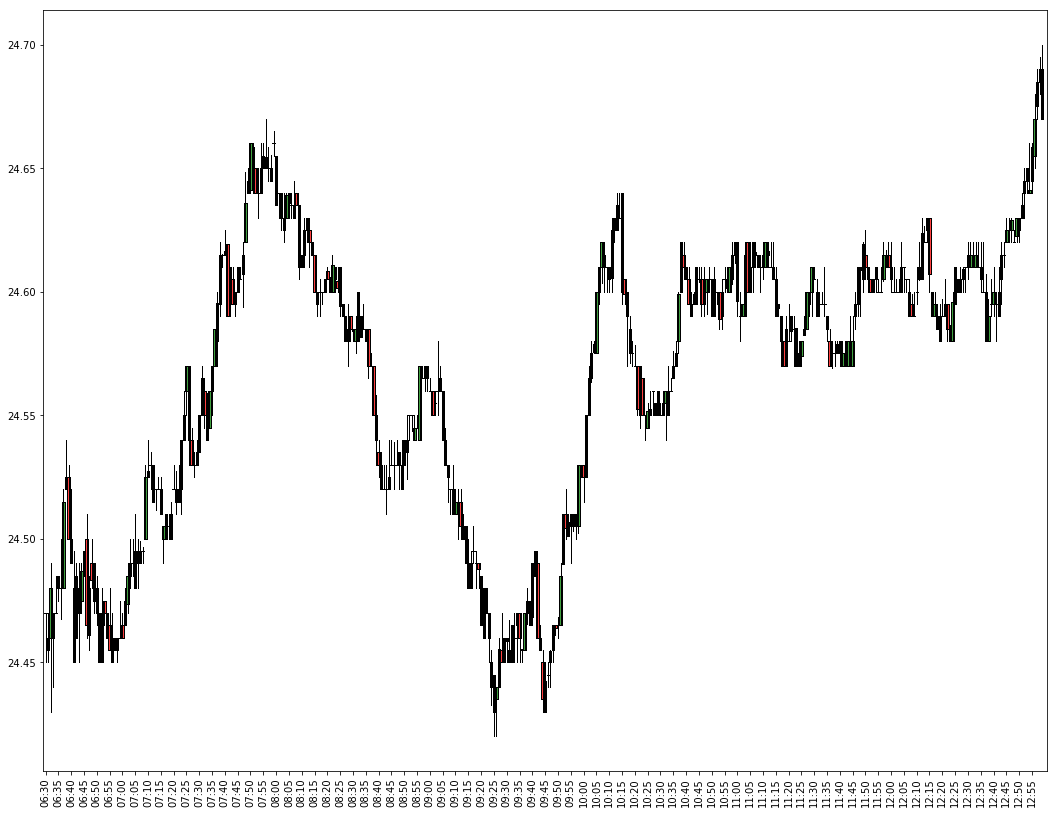

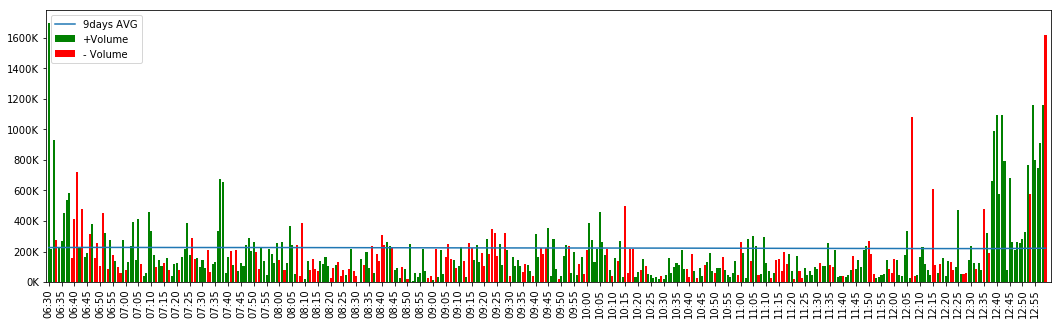

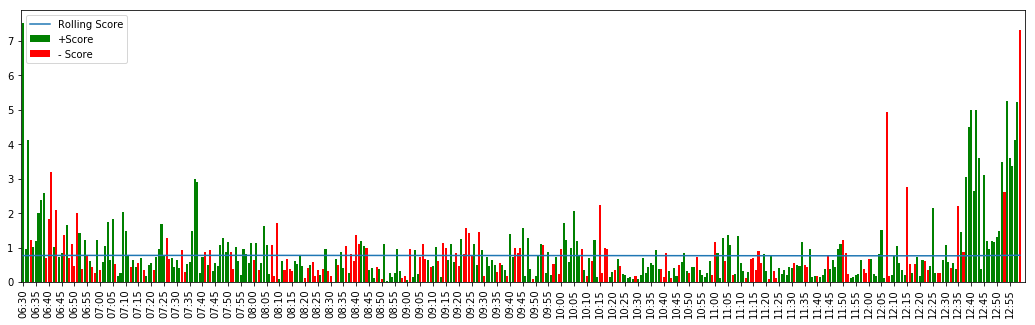

3. AAPL 12:59PM: Rolling Score 0.42627181686873294, Current Score 0.20920255428322587


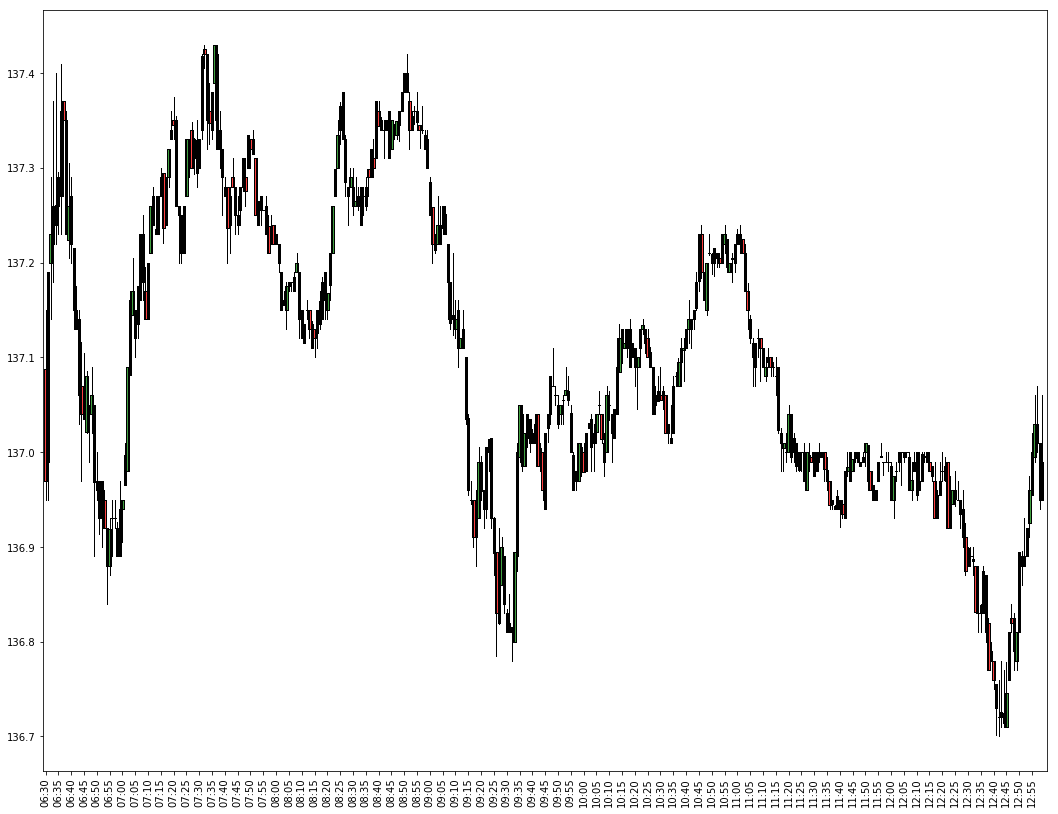

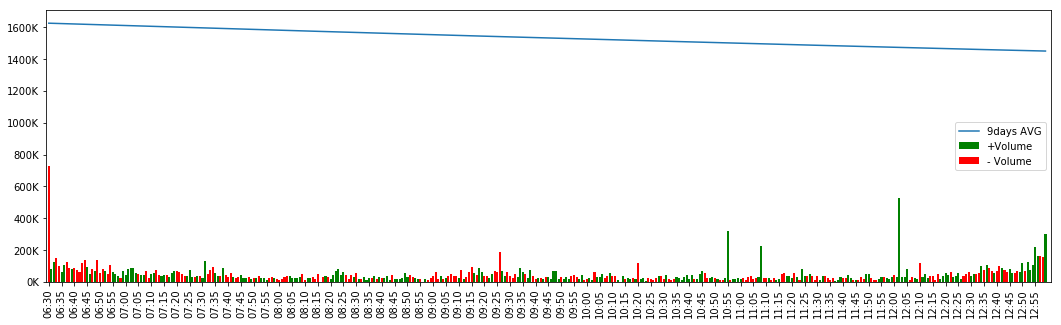

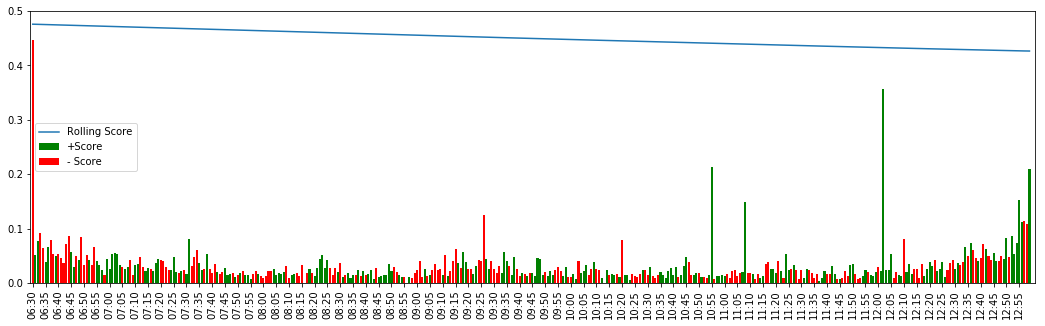

last update 2017-02-28 21:54:58.551712-08:00
prev update 2017-02-28 21:53:57.670801-08:00
update time 0:00:21.906572


KeyboardInterrupt: 

In [13]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = 'America/Los_Angeles'
tz = pytz.timezone(LOCAL_TZ)
stocks = get_stocks()


def display_list_items(top_df, all_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol])

last_time = None
start_date, end_date = None, None
while True:    
    now = datetime.now(tz=tz)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
        
        if end_date is None or start_date is None:
            end_date = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
            start_date = get_start_date(end_date)
        
        df = None
        today = now.date()
        for symbol in stocks:                        
            data = get_data(symbol, start_date, end_date)            
            data_len = len(data)   
            data['symbol'] = symbol
            data['avg9days'] = data.volume.rolling(window=data_len, min_periods=1).mean()
            data['current_score'] = data.volume / data.avg9days
            data['rolling_score'] = data.current_score.rolling(window=data_len, min_periods=1).mean() 
            data['time'] = data.time.dt.tz_convert(LOCAL_TZ)
            todays_data = data[data.time.dt.date == today]
            
            if df is None:
                df = todays_data
            else:
                df = df.append(todays_data, ignore_index=True)
                
        if df is not None:
            clear_output()
            current_time = df.time.max()
            last_minute_data = df[df.time == current_time]
            
            display(HTML("<h3>Rolling Score List</h3>"))           
            top_volimes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)
            
            display(HTML("<h3>Current Score List</h3>"))
            top_volimes = last_minute_data.sort_values(by='current_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)                
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=tz) - now)
        last_time = now        
    else:       
        start_date, end_date = None, None
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)